In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/medsegevaluator

/content/drive/MyDrive/medsegevaluator


In [3]:
ls

bland_altman_plot.py  medicalimageloader.py        __pycache__/
image_morphology.py   perforamce_visualization.py  requirements.txt
image_quality.py      performance_metrics.py       results/


In [4]:
!pip install pydicom

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 26.7 MB/s eta 0:00:00


In [29]:
from pathlib import Path
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import numpy as np

In [6]:
DATA_DIR = Path('/content/drive/MyDrive/BraTS_2025_Ped/BraTS-PEDs2024_Training')

In [7]:
GROUND_TRUTH_DIR = Path('/content/drive/MyDrive/Data/GroundTruth')
INFERENCE_DIR = Path('/content/drive/MyDrive/Data/Inference')

In [8]:
RESULTS_DIR =  Path('/content/drive/MyDrive/medsegevaluator/results')

In [9]:
from medicalimageloader import MedicalImageLoader

In [10]:
# Create loader (normalize=True scales intensities to [0,1])
loader = MedicalImageLoader(normalize=True)

In [11]:
image_path = DATA_DIR / 'BraTS-PED-00001-000/BraTS-PED-00001-000-t1c.nii.gz'

In [12]:
GT_path = GROUND_TRUTH_DIR / 'BraTS-PED-00001-000.nii.gz'
inf_path = INFERENCE_DIR / 'BraTS-PED-00001-000.nii.gz'

In [13]:
image = loader.load_image(image_path)
gt_image = loader.load_image(GT_path)
inf_image = loader.load_image(inf_path)

In [14]:
from perforamce_visualization import visualize_image_contour

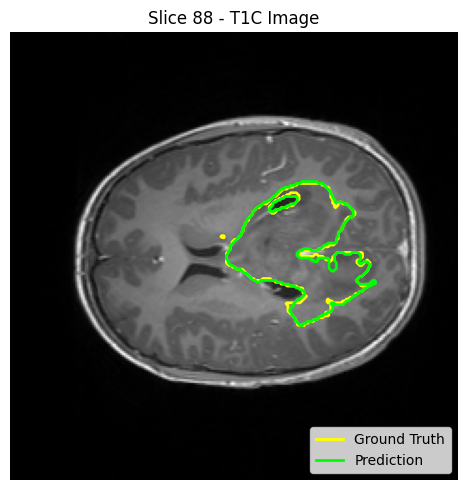

In [15]:
visualize_image_contour(image, gt_image, inf_image, slice_index=88)

In [16]:
from performance_metrics import (
    dice_score, intersection_over_union, precision, recall,
    specificity, hausdorff_distance, hd95, relative_volume_difference,
    volumetric_similarity, nsd, evaluate_all_metrics
)

In [17]:
#calculating for one 3D image
results = evaluate_all_metrics(gt_image, inf_image, voxel_spacing=None)
for k, v in results.items():
    print(f"{k}: {v:.4f}")

Dice: 0.9397
Jaccard: 0.8862
Precision: 0.9405
Recall: 0.9389
Specificity: 0.9991
Accuracy: 0.9983
Hausdorff: 10.4403
HD95: 10.1183
ASD: 0.3384
NSD: 0.9347
Volumetric_Similarity: 0.9991
Relative_Volume_Difference: -0.0017
IoU: 0.8862


In [ ]:
# Use only if you're doing it for the first time; otherwise, use the saved dataframe.
all_results = []
for gt_img_path, inf_img_path in zip(sorted(GROUND_TRUTH_DIR.glob('*.nii.gz')),
                                     sorted(INFERENCE_DIR.glob('*.nii.gz'))):
    # Load images
    gt_image = loader.load_image(gt_img_path)
    inf_image = loader.load_image(inf_img_path)

    # Evaluate metrics
    metrics = evaluate_all_metrics(gt_image, inf_image, voxel_spacing=None)

    # Store results with filenames
    result_dict = {
        "filename": gt_img_path.name,
        **metrics
    }
    all_results.append(result_dict)

In [ ]:
# Convert to DataFrame
df_results = pd.DataFrame(all_results)

# Display and save
print(df_results.head())
output_csv = RESULTS_DIR / 'evaluation_metrics.csv'
df_results.to_csv(output_csv, index=False)
print("✅ Results saved to 'evaluation_results.csv'")

                     filename      Dice   Jaccard  Precision    Recall  \
0  BraTS-PED-00001-000.nii.gz  0.939661  0.886189   0.940466  0.938858   
1  BraTS-PED-00002-000.nii.gz  0.974891  0.951011   0.982415  0.967480   
2  BraTS-PED-00003-000.nii.gz  0.943192  0.892491   0.937883  0.948560   
3  BraTS-PED-00004-000.nii.gz  0.948302  0.901687   0.945764  0.950854   
4  BraTS-PED-00005-000.nii.gz  0.945409  0.896470   0.946509  0.944312   

   Specificity  Accuracy  Hausdorff       HD95       ASD       NSD  \
0     0.999131  0.998262  10.440307  10.118291  0.338385  0.934735   
1     0.999966  0.999902   4.000000   3.870711  0.157948  0.993749   
2     0.999883  0.999788  84.693565  80.581362  0.413102  0.958133   
3     0.999025  0.998179  40.422766  38.613760  0.425397  0.896393   
4     0.999897  0.999789   3.605551   3.537077  0.274506  0.952180   

   Volumetric_Similarity  Relative_Volume_Difference       IoU  
0               0.999144                   -0.001710  0.886189  
1   

In [20]:
output_csv = RESULTS_DIR / 'evaluation_metrics.csv'
df_results = pd.read_csv(output_csv)

In [21]:
df_results.head()

,filename,Dice,Jaccard,Precision,Recall,Specificity,Accuracy,Hausdorff,HD95,ASD,NSD,Volumetric_Similarity,Relative_Volume_Difference,IoU,GT_Volume,GT_Islands,INF_Volume,INF_Islands
0,BraTS-PED-00001-000.nii.gz,0.939661,0.886189,0.940466,0.938858,0.999131,0.998262,10.440307,10.118291,0.338385,0.934735,0.999144,-0.001710,0.886189,128667.0,18.0,128447.0,2.0
1,BraTS-PED-00002-000.nii.gz,0.974891,0.951011,0.982415,0.967480,0.999966,0.999902,4.000000,3.870711,0.157948,0.993749,0.992340,-0.015203,0.951011,17497.0,2.0,17231.0,1.0
2,BraTS-PED-00003-000.nii.gz,0.943192,0.892491,0.937883,0.948560,0.999883,0.999788,84.693565,80.581362,0.413102,0.958133,0.994340,0.011384,0.892491,16602.0,5.0,16791.0,1.0
3,BraTS-PED-00004-000.nii.gz,0.948302,0.901687,0.945764,0.950854,0.999025,0.998179,40.422766,38.613760,0.425397,0.896393,0.997316,0.005383,0.901687,156799.0,10.0,157643.0,1.0
4,BraTS-PED-00005-000.nii.gz,0.945409,0.896470,0.946509,0.944312,0.999897,0.999789,3.605551,3.537077,0.274506,0.952180,0.998838,-0.002320,0.896470,17239.0,4.0,17199.0,1.0


In [22]:
from perforamce_visualization import plot_histogram_comparison, plot_boxplot_by_islands

In [ ]:
df_results["GT_Volume"] = np.nan
df_results["GT_Islands"] = np.nan

for i, row in tqdm(df_results.iterrows(), total=len(df_results), desc="Computing GT Volume & Islands"):
    img_name = row["filename"]
    gt_img_path = GROUND_TRUTH_DIR / img_name

    if not gt_img_path.exists():
        continue

    gt_image = loader.load_image(gt_img_path)

    # Compute metrics
    df_results.loc[i, "GT_Volume"] = get_volume(gt_image)
    df_results.loc[i, "GT_Islands"] = get_island_count(gt_image)


Computing GT Volume & Islands: 100%|██████████| 261/261 [03:40<00:00,  1.18it/s]


In [ ]:
df_results["INF_Volume"] = np.nan
df_results["INF_Islands"] = np.nan

for i, row in tqdm(df_results.iterrows(), total=len(df_results), desc="Computing INF Volume & Islands"):
    img_name = row["filename"]
    inf_img_path = INFERENCE_DIR / img_name

    if not inf_img_path.exists():
        continue

    inf_image = loader.load_image(inf_img_path)

    # Compute metrics
    df_results.loc[i, "INF_Volume"] = get_volume(inf_image)
    df_results.loc[i, "INF_Islands"] = get_island_count(inf_image)


Computing INF Volume & Islands: 100%|██████████| 261/261 [03:12<00:00,  1.36it/s]


In [23]:
#saving a dataframe with added columns with same name.
#output_csv = RESULTS_DIR / 'evaluation_metrics.csv'
#df_results.to_csv(output_csv, index=False)

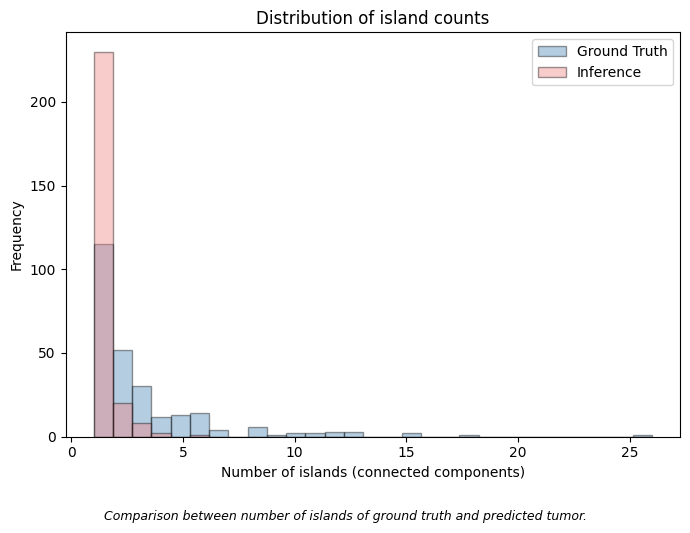

✅ Plot generated for: Distribution of island counts


In [24]:
plot_histogram_comparison(
    df_results["GT_Islands"],
    df_results["INF_Islands"],
    label1="Ground Truth",
    label2="Inference",
    xlabel="Number of islands (connected components)",
    ylabel="Frequency",
    title="Distribution of island counts",
    caption="Comparison between number of islands of ground truth and predicted tumor.",
    bins=30,
    colors=("steelblue", "lightcoral")
)

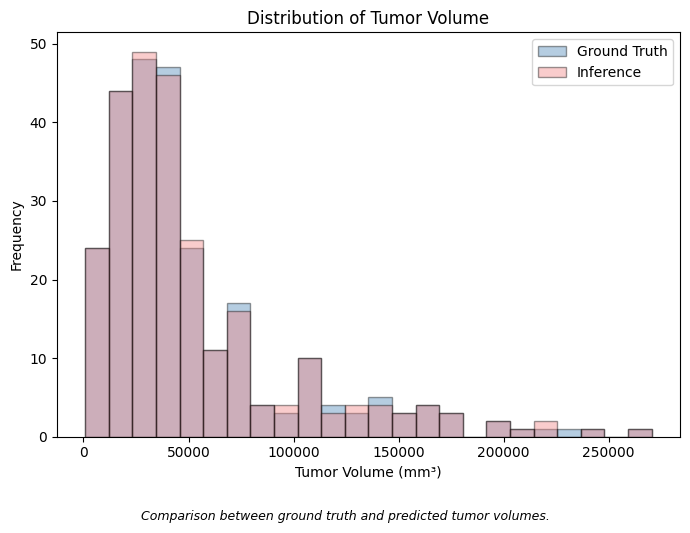

✅ Plot generated for: Distribution of Tumor Volume


In [25]:
plot_histogram_comparison(
    df_results["GT_Volume"],
    df_results["INF_Volume"],
    label1="Ground Truth",
    label2="Inference",
    xlabel="Tumor Volume (mm³)",
    ylabel="Frequency",
    title="Distribution of Tumor Volume",
    caption="Comparison between ground truth and predicted tumor volumes.",
    bins=25,
    colors=("steelblue", "lightcoral")
)

In [26]:
from bland_altman_plot import bland_altman_plot

In [30]:
dice_pred = np.array(df_results['Dice'])

In [31]:
dice_gt = np.ones(len(df_results), dtype=float)

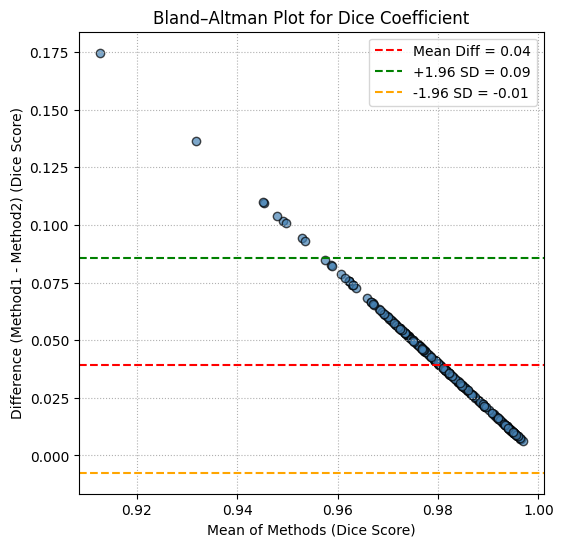

(np.float64(0.03911100098468794),
 np.float64(0.0856943424015875),
 np.float64(-0.007472340432211622))

In [32]:
bland_altman_plot(
    dice_gt,
    dice_pred,
    title="Bland–Altman Plot for Dice Coefficient",
    units="Dice Score",
    figsize=(6, 6)
)

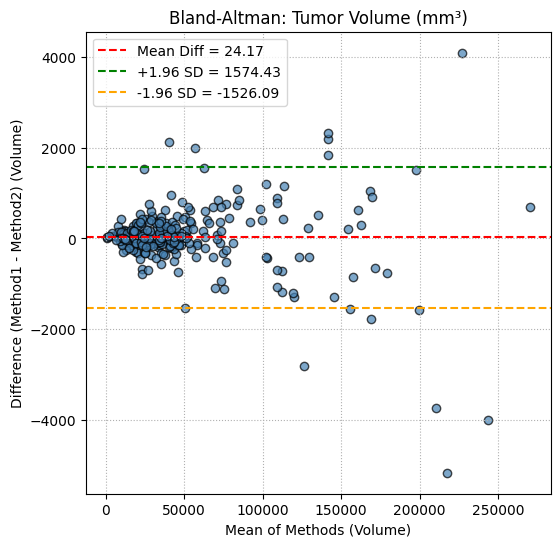

(np.float64(24.168582375478927),
 np.float64(1574.4309622923904),
 np.float64(-1526.0937975414324))

In [33]:
# Bland-Altman plot for GT volume and predicted volume
gt_volume = np.array(df_results['GT_Volume'])
inf_volume = np.array(df_results['INF_Volume'])

bland_altman_plot(
    gt_volume,
    inf_volume,
    title="Bland-Altman: Tumor Volume (mm³)",
    units="Volume",
    figsize=(6, 6)
)

In [34]:
import seaborn as sns

In [35]:
from perforamce_visualization import plot_boxplot_by_islands

/content/drive/MyDrive/medsegevaluator/perforamce_visualization.py:168: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['1 island', '>1 islands'])


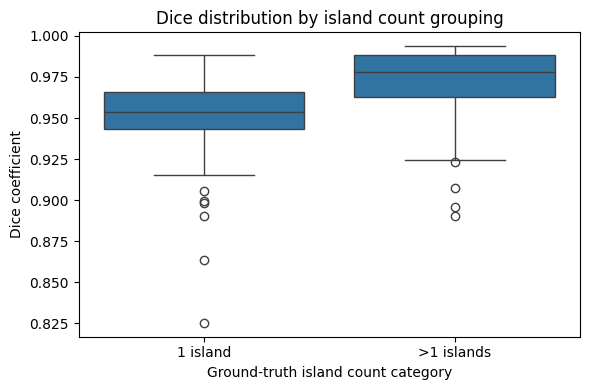

In [36]:
plot_boxplot_by_islands(df_results)

/content/drive/MyDrive/medsegevaluator/perforamce_visualization.py:168: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['1 island', '>1 islands'])


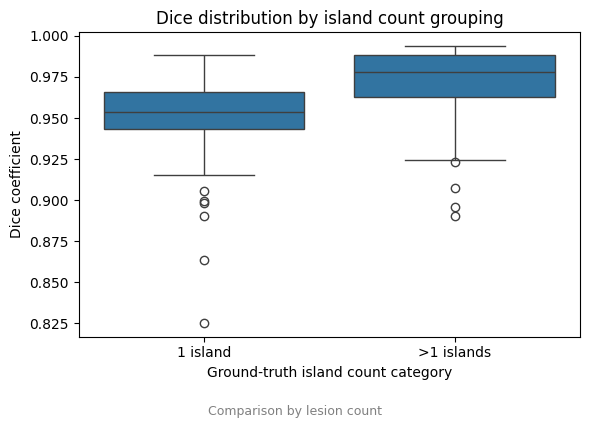

In [37]:
#by providing list or array of GT islands and dice
plot_boxplot_by_islands(np.array(df_results['GT_Islands']), np.array(df_results['Dice']), caption="Comparison by lesion count")
